<a href="https://colab.research.google.com/github/052-Patcharida/ai_detection/blob/ai-detection-cockroach/cockroach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/qhvubiz1l52c817b4nhxx.zip'
extract_to = '/content/'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    print(f"Files extracted to: {os.path.abspath(extract_to)}")


Files extracted to: /content


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/content/images.cv_qhvubiz1l52c817b4nhxx',  # Path where images are stored
    image_size=(224, 224),  # Resize to 224x224 pixels
    batch_size=32
)

# Normalize the images to the range [0, 1]
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))


Found 1359 files belonging to 1 classes.


In [ ]:
from collections import Counter
from sklearn.utils import resample
import numpy as np

# Convert one-hot encoded labels to class labels
y_train_labels = [np.argmax(label) for label in y_train]

# Now you can use Counter with y_train_labels
class_counts = Counter(y_train_labels)
min_count = min(class_counts.values())

# สร้าง DataFrame สำหรับจัดการข้อมูล
import pandas as pd
df = pd.DataFrame({'features': list(x_train), 'labels': list(y_train_labels)}) # Use y_train_labels here

# ลดขนาดข้อมูลคลาสที่มีจำนวนมาก
df_balanced = pd.concat(
    [resample(df[df['labels'] == cls], replace=False, n_samples=min_count, random_state=42)
     for cls in class_counts.keys()]
)

x_train_balanced = np.stack(df_balanced['features'].values)
y_train_balanced = np.stack(df_balanced['labels'].values)


NameError: name 'y_train' is not defined

In [ ]:
from sklearn.utils import resample

# เพิ่มตัวอย่างคลาสที่มีน้อย
df_balanced = pd.concat(
    [resample(df[df['labels'] == cls], replace=True, n_samples=max(class_counts.values()), random_state=42)
     for cls in class_counts.keys()]
)

x_train_balanced = np.stack(df_balanced['features'].values)
y_train_balanced = np.stack(df_balanced['labels'].values)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train.reshape(len(x_train), -1), y_train)
x_train_balanced = x_train_balanced.reshape(-1, *x_train.shape[1:])


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
# Convert one-hot encoded labels to class labels
y_train_labels = np.argmax(y_train, axis=1)

# Calculate class weights using the class labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)

# Create a dictionary mapping class indices to weights
class_weight_dict = dict(enumerate(class_weights))

# Fit the model using the class weights
model.fit(x_train, y_train, class_weight=class_weight_dict)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8437 - loss: 0.4945


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# โหลดชุดข้อมูล MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ปรับขนาดภาพให้เป็น 28x28x1 (ขนาดของรูปภาพที่ใช้ในโมเดล)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# ทำการปรับค่าพิกเซลให้เป็น [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# แปลงค่าป้ายกำกับ (labels) ให้เป็น one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# สร้างโมเดลพร้อม custom bias
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  bias_initializer=tf.constant_initializer(0.1)),  # Custom bias
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout 20% หลัง MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu',
                  bias_initializer=tf.constant_initializer(0.2)),  # Custom bias
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout 30% หลัง Conv2D
    layers.Flatten(),
    layers.Dense(128, activation='relu',
                 bias_initializer=tf.constant_initializer(0.3)),  # Custom bias
    layers.Dropout(0.5),  # Dropout 50% ในชั้น Dense
    layers.Dense(10, activation='softmax',
                 bias_initializer=tf.constant_initializer(0.0))  # Custom bias
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
history = model.fit(x_train, y_train, epochs=30, batch_size=62, validation_data=(x_test, y_test))

# ทดสอบประสิทธิภาพของโมเดล
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6984 - loss: 0.9077 - val_accuracy: 0.9716 - val_loss: 0.0842
Epoch 2/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 65s 60ms/step - accuracy: 0.9571 - loss: 0.1478 - val_accuracy: 0.9827 - val_loss: 0.0521
Epoch 3/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9675 - loss: 0.1093 - val_accuracy: 0.9875 - val_loss: 0.0361
Epoch 4/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9744 - loss: 0.0843 - val_accuracy: 0.9886 - val_loss: 0.0326
Epoch 5/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.9795 - loss: 0.0687 - val_accuracy: 0.9908 - val_loss: 0.0282
Epoch 6/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.9810 - loss: 0.0618 - val_accuracy: 0.9899 - val_loss: 0.0297
Epoch 7/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9828 - loss: 0.0571 - val_accuracy: 0.9909 - val_loss: 0.0253
Epoch 8/30
968/968 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.9830 - loss: 0.0557 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# โหลดชุดข้อมูล MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ปรับขนาดภาพให้เป็น 28x28x1 (ขนาดของรูปภาพที่ใช้ในโมเดล)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# ทำการปรับค่าพิกเซลให้เป็น [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# แปลงค่าป้ายกำกับ (labels) ให้เป็น one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# สร้างโมเดล
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout 20% หลัง MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout 30% หลัง Conv2D
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout 50% ในชั้น Dense
    layers.Dense(10, activation='softmax')  # จำนวนคลาส (ตัวเลข 0-9)
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
# history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# ทดสอบประสิทธิภาพของโมเดล
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f"Test accuracy: {test_acc}")

# ทดสอบโมเดลบนชุดข้อมูลทดสอบ
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# แสดงผลลัพธ์
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
import pandas as pd

# ตัวอย่างข้อมูลที่ต้องการบันทึก
results = {
    "Image_Index": [0, 1, 2, 3, 4],
    "True_Label": [7, 2, 1, 0, 4],
    "Predicted_Label": [7, 2, 1, 0, 3],
    "Correct": [True, True, True, True, False]
}

# สร้าง DataFrame จากข้อมูล
df = pd.DataFrame(results)

# บันทึก DataFrame ลงในไฟล์ Excel
output_file = "model_results.xlsx"
df.to_excel(output_file, index=False, engine='openpyxl')

print(f"Results saved to {output_file}")


Results saved to model_results.xlsx


In [ ]:
# โหลดข้อมูลจากไฟล์ Excel เพื่อตรวจสอบ
df_loaded = pd.read_excel("model_results.xlsx")

# แสดงข้อมูล
print(df_loaded.head())


   Image_Index  True_Label  Predicted_Label  Correct
0            0           7                7     True
1            1           2                2     True
2            2           1                1     True
3            3           0                0     True
4            4           4                3    False


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



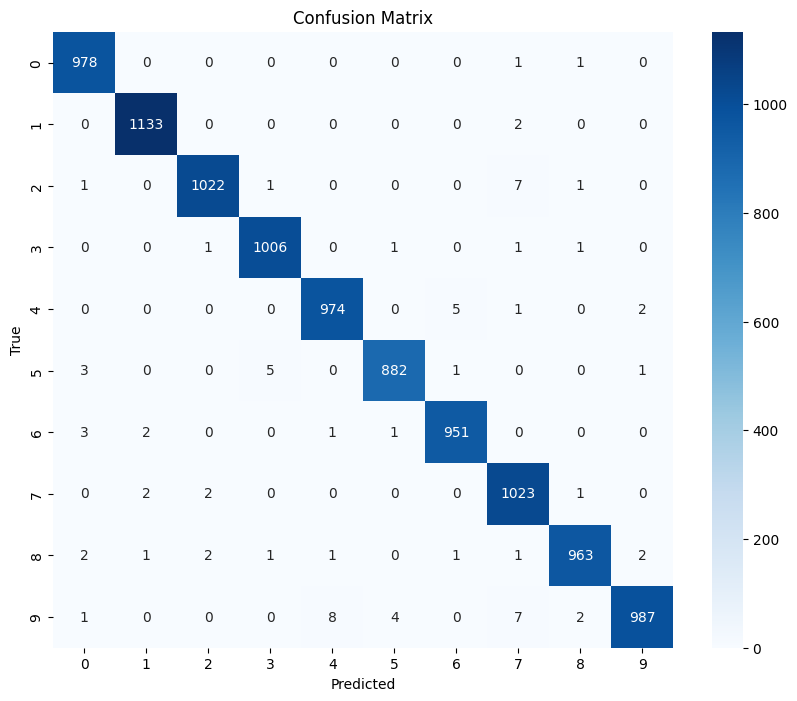

Number of errors: 81


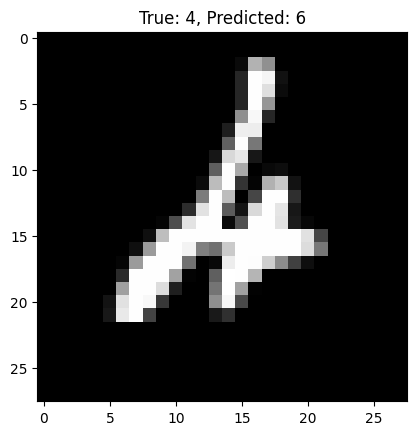

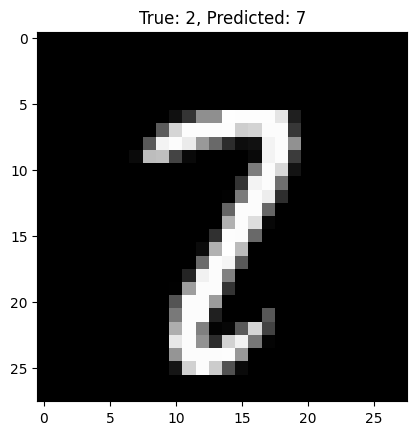

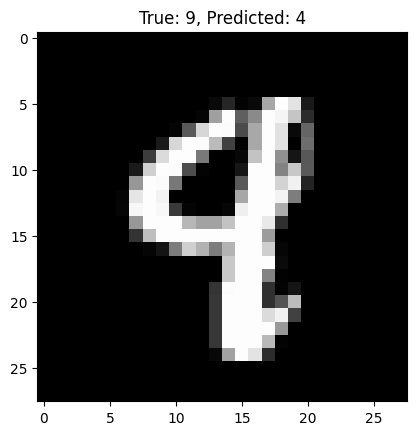

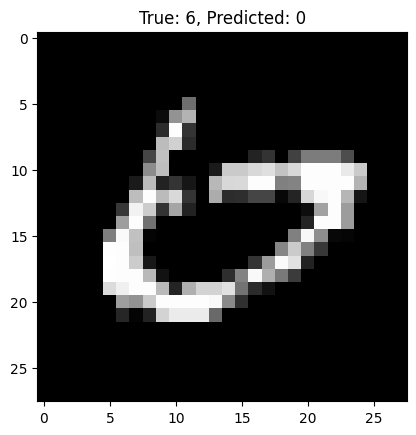

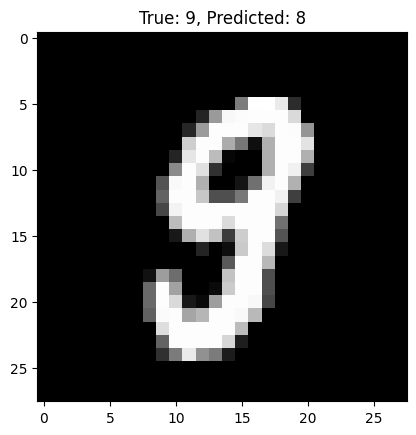

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ทำนายผลลัพธ์ทั้งหมด
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# FIX: Convert y_test to categorical (one-hot encoded) format if it's not already
# This is needed if y_test is a 1D array of labels instead of 2D one-hot encoded format
from tensorflow.keras.utils import to_categorical
if y_test.ndim == 1:  # Check if y_test has only one dimension
    y_test = to_categorical(y_test, num_classes=10) # Assuming 10 classeps for MNIST

true_classes = np.argmax(y_test, axis=1)

# 1. สถิติประสิทธิภาพ
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# 2. แสดง Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 3. ตรวจสอบภาพที่โมเดลทำนายผิด
errors = np.where(predicted_classes != true_classes)[0]
print(f"Number of errors: {len(errors)}")

# แสดงภาพตัวอย่างที่โมเดลทำนายผิด
for i, error in enumerate(errors[:5]):  # แสดงภาพผิด 5 ภาพแรก
    plt.imshow(x_test[error].reshape(28, 28), cmap="gray")  # ปรับตามขนาดภาพ
    plt.title(f"True: {true_classes[error]}, Predicted: {predicted_classes[error]}")
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
